# Description : Zeta Disease Prediction

### Let's Import the required Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### get current working directory

In [2]:
os.getcwd()

'C:\\Users\\ANKIT'

### change the current working directory to project folder

In [3]:
os.chdir("D:\\_AnByCo\\Trainings\\Machine_Learning\\Logistic_Regression\\Carrier")

### Confirm the current working directory is pointing to correct location

In [4]:
os.getcwd()

'D:\\_AnByCo\\Trainings\\Machine_Learning\\Logistic_Regression\\Carrier'

### Load the given Train and Test Datasets

In [5]:
train_data = pd.read_csv('./2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv')
test_data = pd.read_csv('./2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')

### Let's have a look at few top observations for the training data

In [6]:
train_data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


### Let's have a look at few top observations for the test data

In [7]:
test_data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


### How does the shape of the training data look like

In [8]:
train_data.shape

(800, 9)

### How does the shape of the test data look like

In [9]:
test_data.shape

(20, 9)

### Let us have a look at info of training data 

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
age                   800 non-null int64
weight                800 non-null int64
bmi                   800 non-null float64
blood_pressure        800 non-null int64
insulin_test          800 non-null int64
liver_stress_test     800 non-null float64
cardio_stress_test    800 non-null int64
years_smoking         800 non-null int64
zeta_disease          800 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


### Let us have a look at info of test data 

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
age                   20 non-null int64
weight                20 non-null int64
bmi                   20 non-null float64
blood_pressure        20 non-null int64
insulin_test          20 non-null int64
liver_stress_test     20 non-null float64
cardio_stress_test    20 non-null int64
years_smoking         20 non-null int64
zeta_disease          0 non-null float64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB


### Let us have some look at basic stats of training data

In [12]:
train_data.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


### Time to check for missing values in training data

In [13]:
train_data.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [14]:
test_data.isnull().sum()

age                    0
weight                 0
bmi                    0
blood_pressure         0
insulin_test           0
liver_stress_test      0
cardio_stress_test     0
years_smoking          0
zeta_disease          20
dtype: int64

### This is too good data set, no missing values for both training and testing datasets. 
### For test data, zeta_disease shows 20 null values, that is what we have to predict

### Let us have a look at each variable pairplots to check if we see some correlation

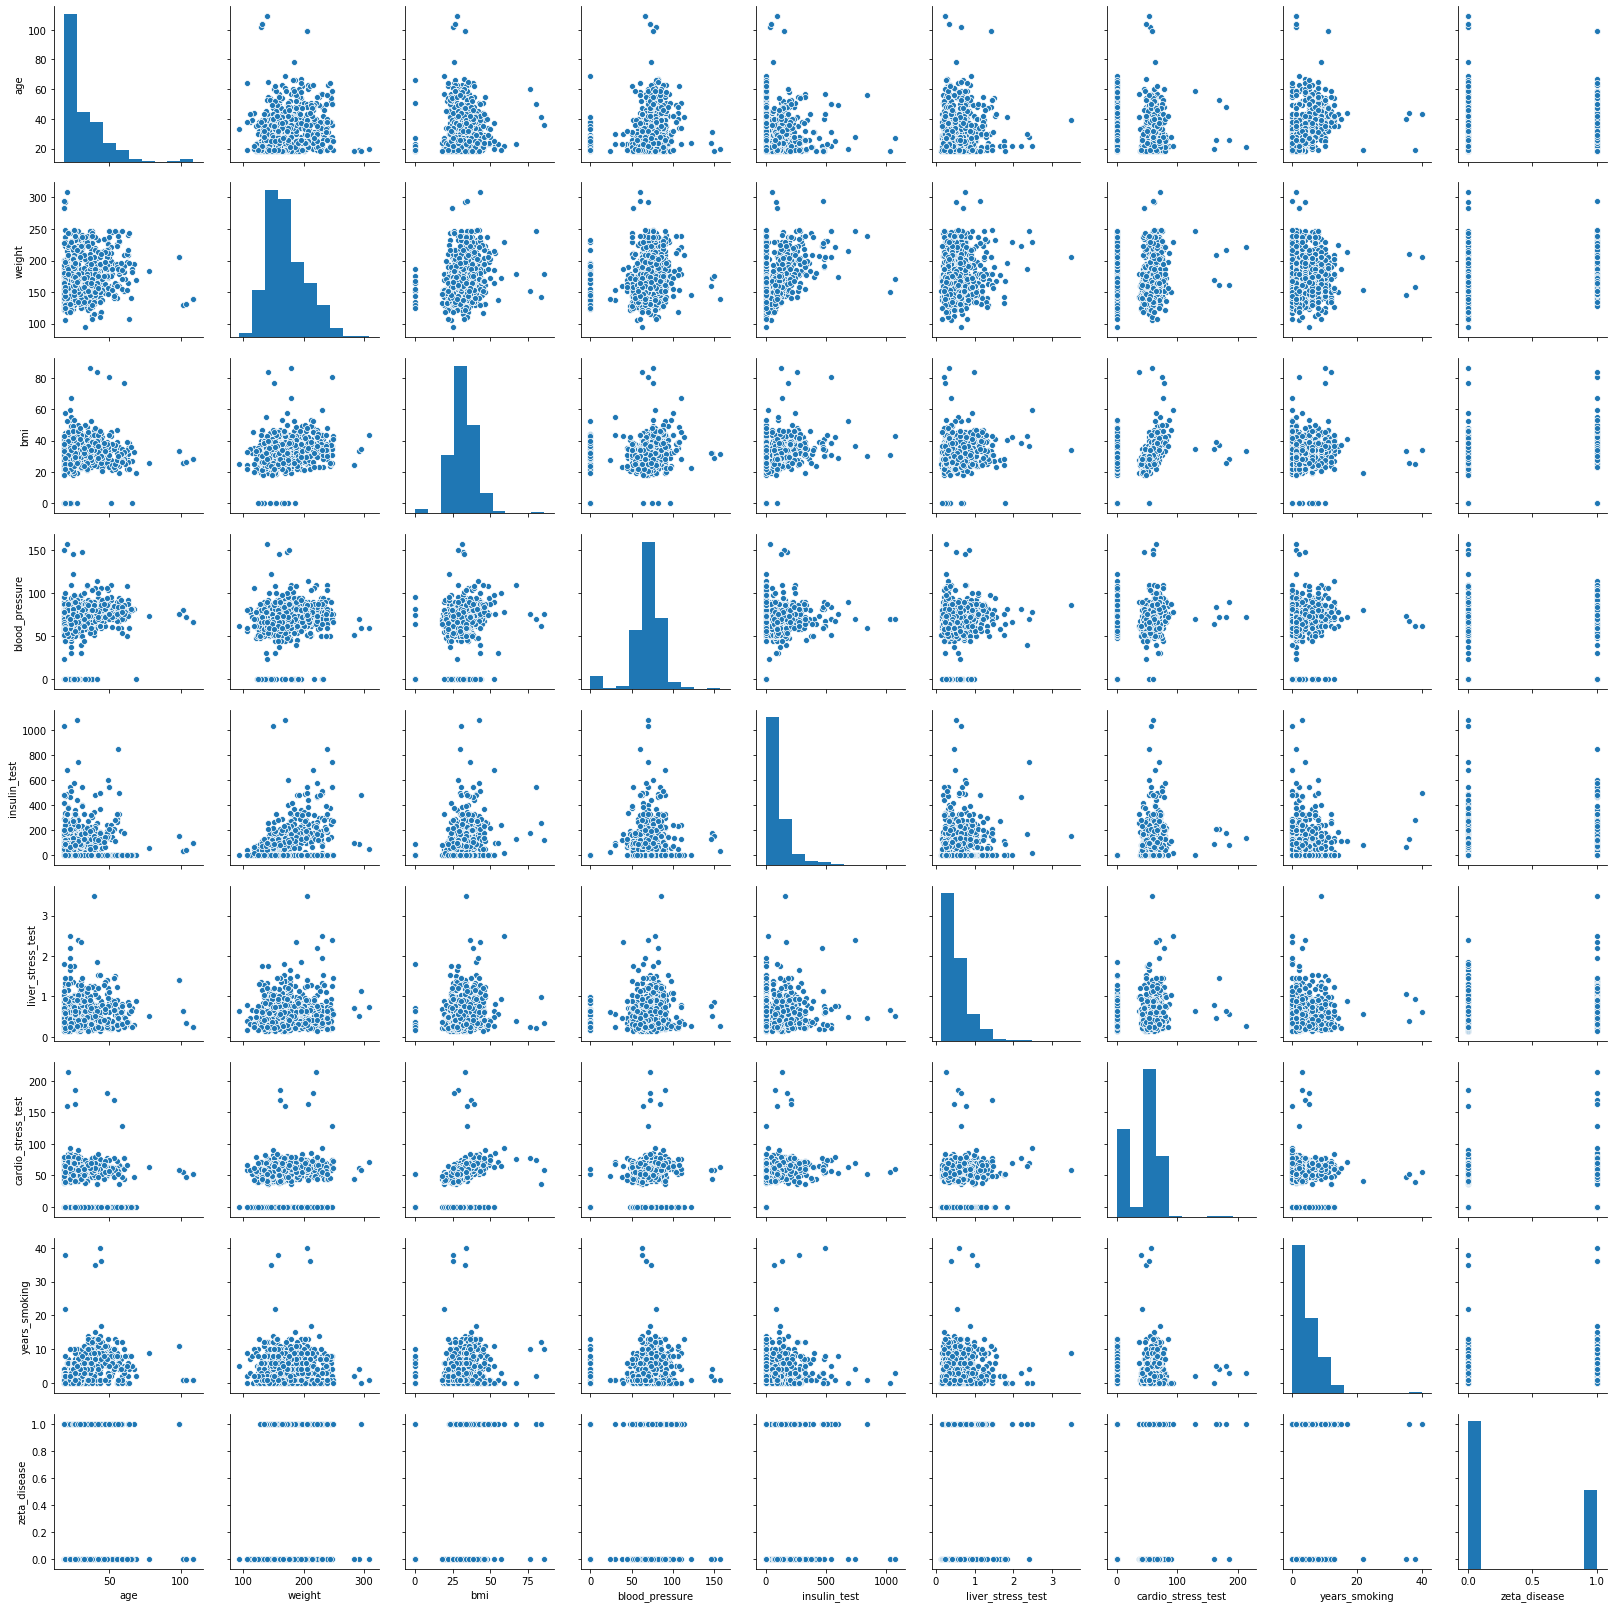

In [15]:
sns.pairplot(train_data)

### Not much linear relationships as we can see, there is slighly linear relationship between bmi and cardio_stress_test there are too many 0's which are flat and few outliers. Not much we can comment right now. Let's move on

### Let's have a look at correlation numbers between variables

In [16]:
train_data.corr()*100

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,100.000000,15.770473,3.534748,19.306598,-3.429423,4.241644,-10.603934,37.237266,19.292518
weight,15.770473,100.000000,21.426156,12.234893,30.429524,14.677851,5.362871,10.083370,47.115473
bmi,3.534748,21.426156,100.000000,24.051285,21.726541,11.664935,26.486094,2.868327,27.185599
blood_pressure,19.306598,12.234893,24.051285,100.000000,7.942480,4.576387,19.322126,9.561340,4.573853
insulin_test,-3.429423,30.429524,21.726541,7.942480,100.000000,17.522994,41.789375,-0.629206,12.650427
liver_stress_test,4.241644,14.677851,11.664935,4.576387,17.522994,100.000000,17.204819,2.181740,18.473765
cardio_stress_test,-10.603934,5.362871,26.486094,19.322126,41.789375,17.204819,100.000000,-8.035783,3.609019
years_smoking,37.237266,10.083370,2.868327,9.561340,-0.629206,2.181740,-8.035783,100.000000,19.526083
zeta_disease,19.292518,47.115473,27.185599,4.573853,12.650427,18.473765,3.609019,19.526083,100.000000


### Like we noticed in pairplots, we can see that there is 26% correlation between cardio_stress_test to bmi, so, nothing much interesting stuff there.

### However, we can see that, there is 47% of correlation between weight and zeta disease. Also, there is 41% of correlation between insuling test and cardio stress test

### Let us have a colorful look using heatmap using seaborn

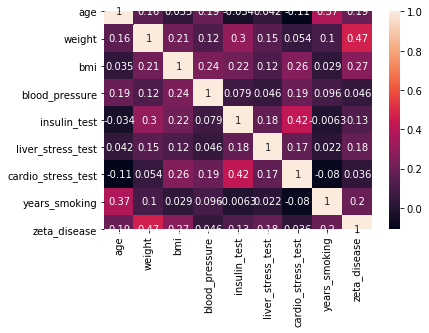

In [17]:
sns.heatmap(train_data.corr(), annot=True)

### Lets keep all the columns of train_data in feature cols and lets have X and y variables

In [18]:
feature_cols = ['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']
X = train_data[feature_cols]
y = train_data['zeta_disease']

### Let's split the train and test data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### lets import LogisticRegression class from sklearn

In [20]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

### Let's predict on train and test data

In [21]:
predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

### Let's have a look at predictions train data

In [22]:
predictions_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

### Lets have a look at raw train data to see if we have good matches with predictions

In [23]:
train_data.head(20)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0
5,49,158,27.0,80,0,0.3218,0,2,1
6,20,154,27.8,64,116,0.5168,53,0,0
7,37,167,34.5,88,145,0.4658,54,1,1
8,21,162,34.8,80,132,0.2798,75,1,0
9,19,186,31.2,70,0,1.2448,0,4,1


### Let us have a look at coefficient and intercept values

In [24]:
logmodel.coef_
logmodel.intercept_

array([[ 0.02233   ,  0.03329785,  0.06221382, -0.01359272, -0.0010246 ,
         0.57764132,  0.00460607,  0.06671772]])

array([-9.1040343])

### Evaluation Metrics

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

print(classification_report(y_train,predictions_train))
print("Accuracy",accuracy_score(y_train,predictions_train))

print(classification_report(y_test,predictions_test))
print("Accuracy",accuracy_score(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       376
           1       0.72      0.54      0.62       184

    accuracy                           0.78       560
   macro avg       0.76      0.72      0.73       560
weighted avg       0.77      0.78      0.77       560

Accuracy 0.7803571428571429
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       145
           1       0.79      0.53      0.63        95

    accuracy                           0.76       240
   macro avg       0.77      0.72      0.73       240
weighted avg       0.76      0.76      0.75       240

Accuracy 0.7583333333333333


In [26]:
### confustion matrix

In [27]:
cnf_matrix = confusion_matrix(y_true = y_train, y_pred = predictions_train)
cm = pd.DataFrame(cnf_matrix)
cm

,0,1
0,337,39
1,84,100


In [28]:
pred_train = np.where(logmodel.predict_proba(X_train)[:,1] > 0.7 ,1 ,0)
pred_test = np.where(logmodel.predict_proba(X_test)[:,1] > 0.7 ,1 ,0)

In [29]:
print(classification_report(y_train,predictions_train))
print("Accuracy",accuracy_score(y_train,pred_train))

print(classification_report(y_test,predictions_test))
print("Accuracy",accuracy_score(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       376
           1       0.72      0.54      0.62       184

    accuracy                           0.78       560
   macro avg       0.76      0.72      0.73       560
weighted avg       0.77      0.78      0.77       560

Accuracy 0.7446428571428572
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       145
           1       0.79      0.53      0.63        95

    accuracy                           0.76       240
   macro avg       0.77      0.72      0.73       240
weighted avg       0.76      0.76      0.75       240

Accuracy 0.7


### Let's Determine False Positive and True Positive Rates

In [30]:
FPR, TPR, _ = roc_curve(y_train,predictions_train)
FPR1, TPR1, _1 = roc_curve(y_test, predictions_test)

### Calculate the AUC

In [31]:
roc_auc = auc(FPR, TPR)
print('ROC AUC:%0.3f'  %roc_auc)

roc_auc1 = auc(FPR1, TPR1)
print('ROC AUC_1:%0.3f' %roc_auc1)

ROC AUC:0.720
ROC AUC_1:0.718


### Plotting the ROC Curve

(-0.05, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

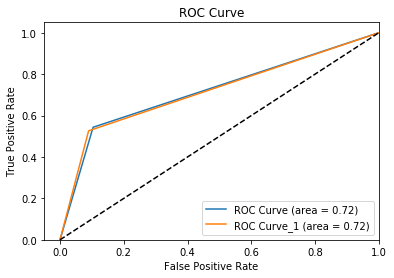

In [32]:
plt.plot(FPR, TPR, label='ROC Curve (area = %0.2f)' %roc_auc)
plt.plot(FPR1, TPR1, label= 'ROC Curve_1 (area = %0.2f)' %roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

### lets drop that zeta column

In [33]:
test_data.drop(labels = 'zeta_disease', axis=1, inplace=True)

### Running the Model on Test Data

In [34]:
test_data_predictions = logmodel.predict(test_data)

In [35]:
test_data_pred = np.where(logmodel.predict_proba(test_data)[:,1] > 0.7, 1, 0)

In [36]:
test_data_pred = pd.DataFrame(test_data_pred)

In [37]:
test_data_pred = pd.concat([test_data, test_data_pred], axis=1)

In [38]:
test_data_pred.rename(columns={0:"zeta_disease"}, inplace = True)

In [39]:
test_data_pred

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,0
9,19,193,25.8,84,66,1.7938,50,3,0


### Let's export the test predictions to csv

In [40]:
test_data_pred.to_csv(r'D:\\_AnByCo\\Trainings\\Machine_Learning\\Logistic_Regression\\Carrier\\zeta_predictions.csv', index = False)